In [2]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/')
from utility import *

# main figure 

4.048735263805579, 0.21288072109489126
8.018393699184227, 0.23612585103488726
12.060435817453767, 0.21597424378427016
16.032563711943055, 0.21765015753060699
20.05712308655243, 0.24807244811281504


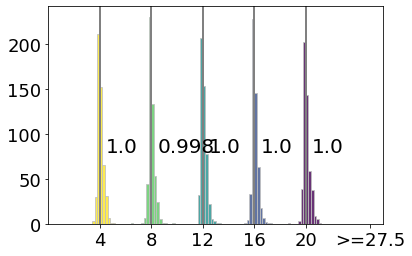

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

plt.rcParams["font.family"] = "Arial"

fig, ax = plt.subplots()

bl_lens = [4, 8, 12, 16, 20]
bins = np.linspace(0, 25, 126) # bins of 0.2cm

fs_l = 12
fs = 12
fs_t = 18
color_fp = "red"
ec = "silver"
cmap = "viridis_r"
alpha = 0.8
xlim = (0,26)

df_called, powers = lengthCallAll(bl_lens, '', './calledIBD', threshold=0.8)
assert(len(bl_lens)==len(df_called)==len(powers)) # Sanity Check
    
### Set Colors
cmap = cm.get_cmap(cmap)
colors = [cmap(x) for x in np.linspace(0,1, len(bl_lens))]
    
####### Do the actual Plot
# Plot All Histograms        
for i in range(len(bl_lens)):
    l = bl_lens[i]
    print(f'{np.mean(df_called[i])}, {np.std(df_called[i])}')
    df_called_trunc = np.array(df_called[i])
    df_called_trunc[df_called_trunc>=27.5] = 27.5
    plt.hist(df_called_trunc, bins = bins, color = colors[i], alpha=alpha, 
            label= str(l) + " cM", ec=ec)
    plt.axvline(l, color = "gray", linewidth=2)
    plt.text(l+0.5, 80, round(powers[i], 3), fontsize=20, fontweight='roman')
    
 
        
    plt.xlim(xlim)
    plt.xticks(bl_lens + [25])
    ax.set_xticklabels(bl_lens + ['>=27.5'])
    plt.tick_params(axis='both', labelsize=fs_t)


plt.savefig('modVSmod.png', dpi=300)